Homework 2: Simple Linear regression using Tensorflow in Python
- Inteligencia artifical 2
- Andrés Hernández Gutiérrez
- Universidad de Monterrey
- David Sebastián Izaguirre Garza #583840
- Ingeniería en Robótica y Sistemas Inteligentes
- 30 de agosto de 2024 Monterrey, Nuevo León

Al momento de realizar un codigo en cualquier lenguaje es importante identificar el proceso que vas a requirir para lograrlo, como las funciones y tipo de variables que vas a crear. Importar bibliotecas es un paso importante ya que dentro de estás puedes encontrar las funciones específicas que puedes necesitar. En este caso, se importaron las siguientes librerias.
- Numpy:  Permite crear una estructura de datos universal, para crear un mejor análisis de datos debido a un intercambio de datos entre distintos algoritmos. Se caracteriza por tener vectores multidimensionales y por la creación de matrices que disponen de gran capacidad.
- Pandas: Se usa comunmente para el Data Science. Permite trabajar los datos con más facilidad, debido a que sus estructuras se conforman por una serie de datos para dos dimensiones lo que lo hace cómodo de usar para estadística o economía.
- Tensorflow: Es necesario si se va a usar para hacer cálculos numéricos. Es usado para diagrmaas de flujo para el Deep Learning ya que permite crear redes neuronales.
- Matplotlib: Librería comunmente usada para la creación de una gran variedad de gráficos como diagramas de barras, histogramas, series temporales o espectros de potencia.
- sklearn.model_selection: Se usa para la creación de modelos de aprendizaje automático o machine learning y para el análisis de datos como acciones de regresión, clasificación y agrupación de datos.

In [5]:
#Import standard libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Se esta creando una función "generate_data" que generará datos de manera aleatoria, con base a un modelo lineal con un nivel de ruido
Los parámetros que necesita esta función son:
- True_coeffs: es un array de Numpy que coontiene los coeficientes del modelo lineal. Debe de ser de [10 0]. El primer coeficiente representa la intersección del eje y, mientras que el segundo representa la pendiente de la recta
- noise_std: Desviación estándar del ruido gaussiano, por lo general es 2.
- num_samples: Representa el número de muestras que se generaran. En este caso es 100.

- np.random.seed: Fija la semilla del generador de números a 4500. Lo que permite que cada que se ejecute la función los números que se generen sea los mismos.

- np.arange(): esta función sirve para generar una serie de datos según los límites establecidos, en este caso de 0 a 99. Estos valores representan la variable independiente para la gráfica que se generará.

- y = true_coeffs[0] + true_coeffs[1]*x : esta función calcula la variable dependiente para la gráfica usando la relación lineal en los coeficientes de los datos. 
- true_coeffs[0]: es el intercepto, el valor en este caso será 10
- true_coeffs[1]*x: es la parte lineal del coeficiente, se va a multiplicar el valor con cada valor que haya en 'x'
- np.random.normal(loc=0.0, scale=noise_std, size=num_samples): Se agrega ruido gaussiano a la variable 'y'.
- loc= 0.0: la media del ruido generado sera de 0
- noise_std: representa la desviación estandar, al no especificar un valor se da 2 por defecto. 
- size = num_samples: asegura que los valores que se generen sean 100.

El objetivo es que genere los datos 'x' y 'y' que serán usados para la creación de una gráfica

In [2]:
def generate_data(true_coeffs = np.array([10,1]),noise_std = 2, num_samples = 100):
    #seed for reproducibility
    np.random.seed(4500)

    #generate synthetic data
    x = np.arange(0,100,1)
    y = true_coeffs[0] + true_coeffs[1]*x + np.random.normal(loc = 0.0,scale =noise_std, size=num_samples)

    #return features and response
    return(x,y)   

Esta parte edl código tiene la función de utilizar la función que se creo anteriormente para generar una serie de datos que se usaran más adelante. El resultado de esos datos serán guardados en las variables 'x' y 'y'
- true_coeffs = np.array ([10,1]): Se define un array con los valores de 10 y 1. El valor 10 representa la intersección con el eje y, mientras que el valor 1 es la pendiente que tendrá la recta (la relación entre 'x' y 'y')
- noise-std = 5: Se declara que la desviación estándar del ruido es de 5. Esto puede generar que habrá una variabilidad con los datos alrededor de la recta.

In [3]:
#Generate a synthetic dataset for simple linear regression
true_coeffs = np.array([10,1])
noise_std = 5
x,y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)

Esta parte del código graficará los datos que se generarón anteriormente y los mostrará en una gráfica de puntos.
- plt.figure(figsize = (10,7)): Declaramos la creación de una figura, al agregar 'figsize' declaramos que el tamaño de esa gráfica sea de 10 pulgadas de ancho por 7 de alto
- plt.scatter(x,y,label = 'Synthetic dataset'): Esto genera un gráfico de dispersión, donde se toma 'x' como variable independiente, 'y' como variable dependiente y 'label' añade una etiqueta al conjunto de datos, en este caso, es 'Synthetic dataset'
- plt.xlabel: Coloca una etiqueta al eje x de la gráfica
- plt.ylabel: Coloca un etiqueta al eje y de la gráfica
- plt.title: mostrará el título del gráfico, en este caso el título contiene valores que declaramos anteriormente y símbología matemática.
- fontsize = 20: se declara que el tamaño de fuente del título es de 20
- plt.legend(): agrega la leyenda que se estableció en la declaración como 'label' para colocarlo en el gráfico 
- plt.show(): muestra la gráfica final, con todas la modificaciones que se hicieron.


<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\david\AppData\Local\Temp\ipykernel_14544\1122978673.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$f_{\mathbf{w}}(x)$",fontsize= 20)


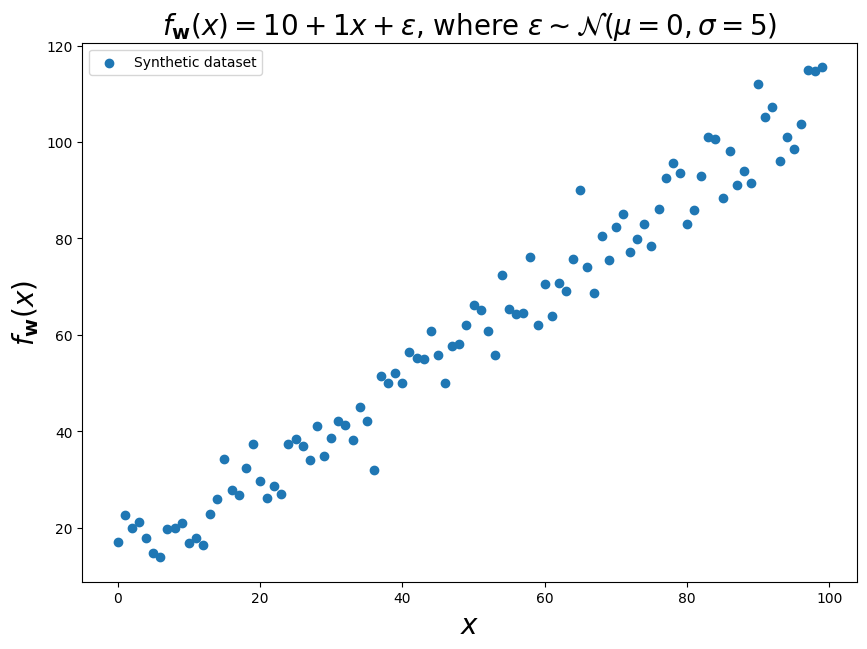

In [4]:
# Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x,y,label='Synthetic dataset')
plt.xlabel(r"$x$",fontsize = 20)
plt.ylabel("$f_{\mathbf{w}}(x)$",fontsize= 20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu = 0, \sigma = {noise_std})$",
          fontsize = 20)
plt.legend()
plt.show()

Esta parte dividirá los datos que se generaron para usarse para el entrenamiento y de prueba.
- x_train, y_train: contiene los datos 'x' y 'y' que serán usados para entrenar el modelo.
- x_test, y_test: contiene los datos 'x' y 'y' que serán usados para probar el modelo.
- train_test_split: permite dividir los datos entre diversas variables
- x,y: son arreglos que contienen los datos anteriormente generados. Los datos 'x' y 'y' presentes en la gráfica.
- test_size = 0.2: Específica el tamaño en el que se dividiran los datos, en este caso, se guardara el 20% de las muestras en las variables de prueba.
- random_state = 42: Fija el generador de números aleatorios para garantizar que sean los mismos sin importar las veces que se reproduzca el código.
shuffle = True: Establece que lso datos deben de ser mezclados antes de ser divididos para evitar problemas en la división.


In [7]:
#Split the data into training and testing sets using train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42, shuffle = True)

Esta parte del código graficará los datos que se generarón anteriormente y los mostrará en una gráfica de puntos.
- plt.figure(figsize = (10,7)): Declaramos la creación de una figura, al agregar 'figsize' declaramos que el tamaño de esa gráfica sea de 10 pulgadas de ancho por 7 de alto
- plt.scatter(x,y,label = 'Testing dataset'): Esto genera un gráfico de dispersión, donde se toma 'x' como variable independiente, 'y' como variable dependiente y 'label' añade una etiqueta al conjunto de datos, en este caso, es 'Testing dataset'
- plt.scatter(x_train,y_train,label='Training dataset',color = [1,0,0]): Genera un gráfico de dispersión que toma como eje x los datos de 'x_train', como eje y los datos de 'y_train', que genere una leyenda como 'Training dataset' y que posea un color rojo.
- plt.xlabel: Coloca una etiqueta al eje x de la gráfica
- plt.ylabel: Coloca un etiqueta al eje y de la gráfica
- plt.title: mostrará el título del gráfico, en este caso el título contiene valores que declaramos anteriormente y símbología matemática.
- fontsize = 20: se declara que el tamaño de fuente del título es de 20
- plt.legend(): agrega la leyenda que se estableció en la declaración como 'label' para colocarlo en el gráfico 
- plt.show(): muestra la gráfica final, con todas la modificaciones que se hicieron.

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\david\AppData\Local\Temp\ipykernel_2600\3180716392.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$f_{\mathbf{w}}(x)$",fontsize= 20)


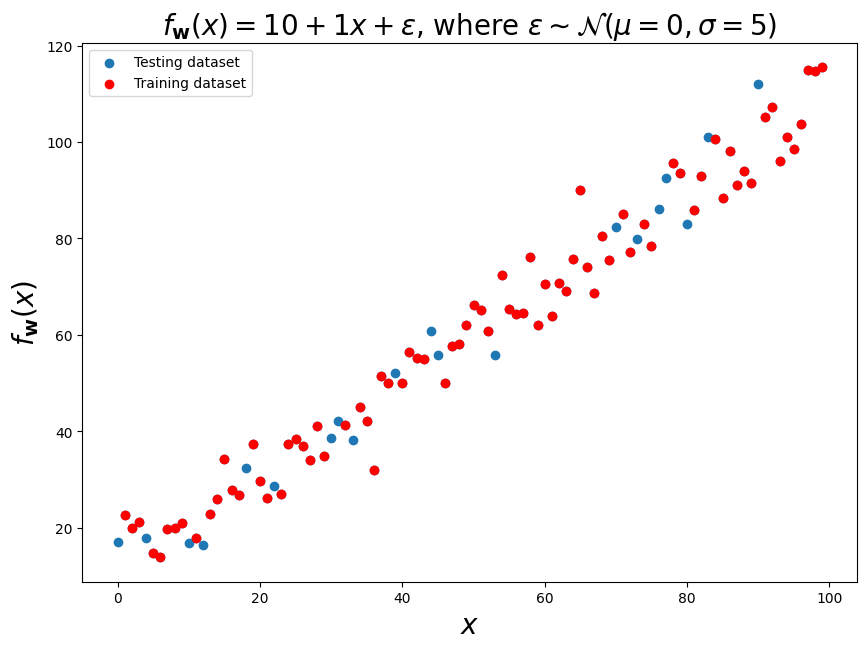

In [9]:
#Visualise the generated synthetica dataset

plt.figure(figsize=(10,7))
plt.scatter(x,y,label='Testing dataset')
plt.scatter(x_train,y_train,label='Training dataset',color = [1,0,0])
plt.xlabel(r"$x$",fontsize = 20)
plt.ylabel("$f_{\mathbf{w}}(x)$",fontsize= 20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu = 0, \sigma = {noise_std})$",fontsize = 20)
plt.legend()
plt.show()

Esta parte define un modelo para una red neuronal simple, utiliza Tensorflor y Keras.
- tf.keras.Sequential: Crea un modelo secuencial con Keras, para apilar capas de la red neuronal en orden lineal.
- tf.keras.layers.Input(shape=(1,)): Es la capa de entrada de la red neuronal. 'Shape=(1,)' indica que solo ocupa una entrada y que cada entrada tiene una dimensión, la ',' es importante por su tamaño.
- tf.keras.layers.Dense(1): Añade una capa densa como completamente. 'Dense' establece que la cada neurona de la capa anterior con cada neurona. '1' Indica que cada capa tiene una neurona lo que permite calcular un valor de salida único.

In [10]:
#Build the linear regression model using a multiple-input single neuron
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

dddd

In [11]:
#Compile the model
model.compile(optimizer = 'adam', loss ='mse')

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

dddd

In [12]:
#Train the model
model.fit(x_train,y_train, epochs = 500, batch_size = 10, validation_split = 0.10, verbose = 1)

#Evaluate the model
loss = model.evaluate(x_test,y_test)
print(f'\nTest Loss: {loss}')

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 1111.4274 - val_loss: 1276.1914
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 1110.5298 - val_loss: 1240.0623
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1055.6027 - val_loss: 1204.9435
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1135.3312 - val_loss: 1170.0273
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1185.0431 - val_loss: 1134.9529
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1066.2683 - val_loss: 1101.6108
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 994.9339 - val_loss: 1069.3765
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 899.3470 - val_loss: 1037.4819
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1091.6879 - val_loss: 1006.4521
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 748.4640 - val_loss: 976.8390
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 832.0427 - val_loss: 946.7185
Epoch 12/500


ds

In [13]:
#print the weights of the trained model
weights = model.layers[0].get_weights()
print(f"Weights [w1]: {weights[0]}")
print(f"Biases [w0]: {weights[1]}")

Weights [w1]: [[1.1303109]]
Biases [w0]: [1.0748445]


sds

In [14]:
#Make predictions

y_pred = model.predict(x_test)

#make predictions
y_pred_train  = model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Esta parte del código graficará los datos de predicción y los mostrará en una gráfica de puntos.
- plt.figure(figsize = (12,6)): Declaramos la creación de una figura, al agregar 'figsize' declaramos que el tamaño de esa gráfica sea de 12 pulgadas de ancho por 6 de alto
- plt.scatter(x_train,y_train,label='Training Data'): Esto genera un gráfico de dispersión, donde se toma 'x_train' como variable independiente, 'y_train' como variable dependiente y 'label' añade una etiqueta al conjunto de datos, en este caso, es 'Training Data'
- plt.plot(x_train, y_pred_train,label = 'Model', linewidth = 3, color = [1,0,0]): Genera una gráfica lineal con los datos de 'x_train' y 'y_pred_train'. Además, generará una leyenda para sus datos con el nombre de 'Model', tendrá un grosor de 3 y será de color rojo. 
- plt.xlabel: Coloca una etiqueta al eje x de la gráfica
- plt.ylabel: Coloca un etiqueta al eje y de la gráfica
- plt.title: mostrará el título del gráfico, en este caso el título contiene valores que declaramos anteriormente y símbología matemática.
- fontsize = 20: se declara que el tamaño de fuente del título es de 20
- plt.legend(): agrega la leyenda que se estableció en la declaración como 'label' para colocarlo en el gráfico 


<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:6: SyntaxWarning: invalid escape sequence '\h'
C:\Users\david\AppData\Local\Temp\ipykernel_2600\2373019023.py:6: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$",fontsize= 20)


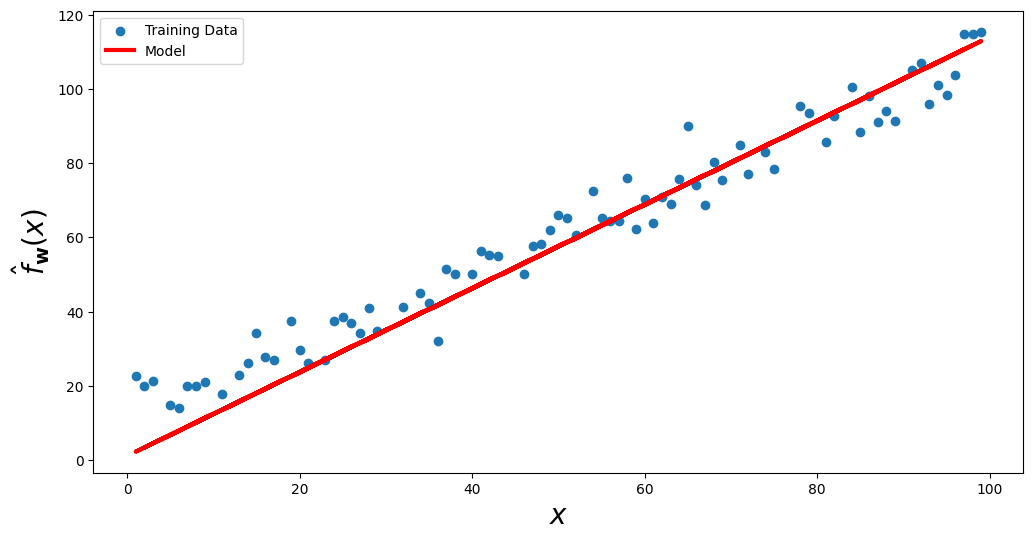

In [16]:
#Plot the results
plt.figure(figsize=(12,6))
plt.scatter(x_train,y_train,label='Training Data')
plt.plot(x_train, y_pred_train,label = 'Model', linewidth = 3, color = [1,0,0])
plt.xlabel(r"$x$",fontsize = 20)
plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$",fontsize= 20)
plt.legend();

Referencias:
- Immune Technology Institute (2022). Librerías de Python, ¿qué son y cuáles son las mejores?. Recuperado de: https://immune.institute/blog/librerias-python-que-son/ 
- Bot Bark (2019). Creating Synthetic Data for Linear Regression. Recuperado de: https://botbark.wordpress.com/2019/12/28/creating-synthetic-data-for-linear-regression/ 
-  Copulas (2022). Synthetic Data for Machine Learning. Recuperado de: https://sdv.dev/Copulas/tutorials/04_Syntehtic_Data_for_Machine_Learning.html 
- 